In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

In [2]:
forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

In [3]:
n_class = 0
X = []
y = []
for i in (forest_data_path, tallbuilding_data_path, highway_data_path):
    for j in i:
        X.append(np.loadtxt(j))
        y.append(n_class)
    n_class+=1

X = np.array(X).reshape(-1, 36*23)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Using sklearn

In [58]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X_train, y_train).transform(X_train)

C:\Users\BHARGAVARAMU\Anaconda3\envs\term1\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [28]:
lda.score(X_test, y_test)

0.72535211267605637

In [59]:
y_pred = lda.predict(X_test)

In [61]:
scores = lda.decision_function(X_test)
np.save('LDAscores', scores)
np.save('LDAprediction', y_pred)
np.save('LDAactual', y_test)

#### Implementation

In [15]:
# Create class wise data from splits
X1 = []
X2 = []
X3 = []
for i,j in zip(X_train, y_train):
    if j == 0:
        X1.append(i)
    elif j==1:
        X2.append(i)
    else:
        X3.append(i)
        
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)

# Global mean
M = X_train.mean(axis=0)

#Sw Sb
# (Sw1, M1) = (np.linalg.pinv(np.dot(X1.transpose(), X1)), X1.mean(axis=0))
# (Sw2, M2) = (np.linalg.pinv(np.dot(X2.transpose(), X2)), X2.mean(axis=0))
# (Sw3, M3) = (np.linalg.pinv(np.dot(X3.transpose(), X3)), X3.mean(axis=0))

(Sw1, M1) = (np.cov(X1.transpose()), X1.mean(axis=0))
(Sw2, M2) = (np.cov(X2.transpose()), X2.mean(axis=0))
(Sw3, M3) = (np.cov(X3.transpose()), X3.mean(axis=0))

Sw = Sw1+Sw2+Sw3

Sb = X1.shape[0]*np.dot((M1-M).reshape(M.shape[0],1), (M1-M).reshape(-1,M.shape[0])) + \
    X2.shape[0]*np.dot((M1-M).reshape(M.shape[0],1), (M1-M).reshape(-1,M.shape[0]))+ \
    X3.shape[0]*np.dot((M1-M).reshape(M.shape[0],1), (M1-M).reshape(-1,M.shape[0]))

# Find direction
S = np.linalg.pinv(Sw)*Sb
(e_val, e_vec) = np.linalg.eig(S)

w_lda = abs(e_vec[:,:2])

In [16]:
w_lda.shape

(828, 2)

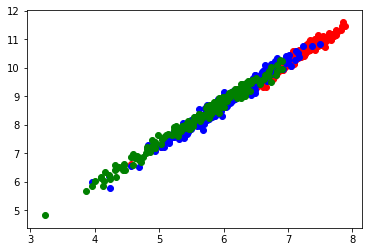

In [17]:
for i in X1:
    temp = np.dot(w_lda.transpose(), i)
    plt.scatter(temp[0], temp[1], color = 'r')

for i in X2:
    temp = np.dot(w_lda.transpose(), i)
    plt.scatter(temp[0], temp[1], color = 'b')
    
for i in X3:
    temp = np.dot(w_lda.transpose(), i)
    plt.scatter(temp[0], temp[1], color = 'g')
plt.show()

In [20]:
for i in X_test[:10]:
    temp = np.dot(w_lda.transpose(), i)
    print(temp)

[ 6.15930976  9.05102171]
[ 4.37130813  6.664865  ]
[ 5.78996308  7.98759207]
[  7.47336261  10.9869092 ]
[ 6.50126742  9.55217263]
[  6.9311799   10.13657527]
[  7.29705191  10.43538806]
[ 6.60806247  9.59223998]
[ 5.31048178  7.80911194]
[ 4.86630383  7.19331697]


In [29]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



C:\Users\BHARGAVARAMU\Anaconda3\envs\term1\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ValueError: Invalid RGBA argument: 0

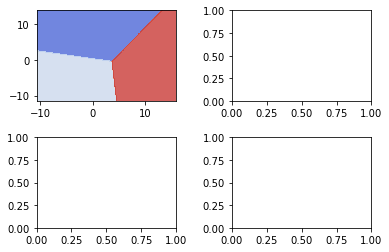

In [57]:
X = lda.fit(X_train, y_train).transform(X_test)
y = y_test

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (lda,
          lda,
          lda,
          lda)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('LDA',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_r2[:, 0], X_r2[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

C:\Users\BHARGAVARAMU\Anaconda3\envs\term1\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ValueError: X has 2 features per sample; expecting 828

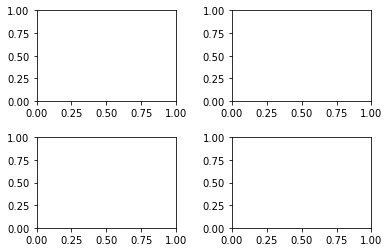

In [40]:
# Set-up 2x2 grid for plotting.

models = (lda, lda)
models = [clf.fit(X_train, y_train) for clf in models]

# title for the plots
titles = ('LDA')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_r2[:, 0], X_r2[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [22]:
X_ = np.array([np.dot(w_lda.transpose(), i) for i in X1])

In [37]:
type(models)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [ ]:
X0, X1 = X_r2[:, 0], X_r2[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()